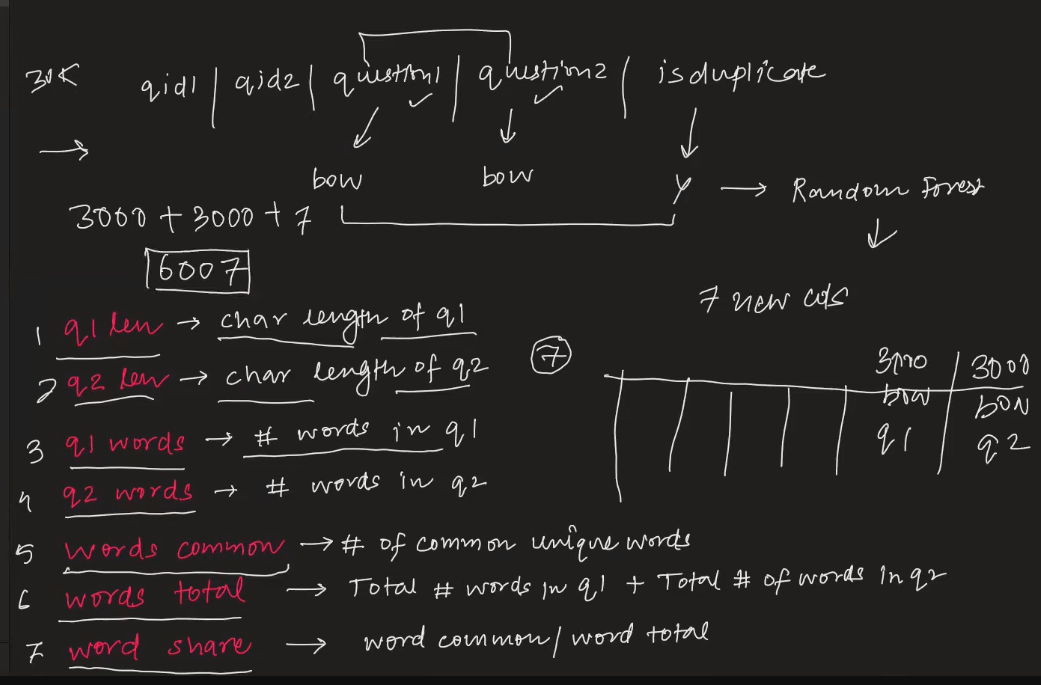

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
big_df = pd.read_csv('questions.csv')
# df = df[:30000]
df = big_df.sample(30000)
print(big_df.shape)
print(df.shape)
df.head()

(404351, 6)
(30000, 6)


,id,qid1,qid2,question1,question2,is_duplicate
325133,325133,637752,637753,What should good education be like?,What is good education?,1
362175,362175,709068,709069,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...,0
271986,271986,534900,534901,Is feminism going too far in western countries?,Do you think that there are some ways that fem...,1
218436,218436,430670,430671,What individuals and events in history are a s...,What individuals and events in history are a s...,0
316672,316672,621402,549635,What exactly is reality distortion field?,How can I develop my own reality distortion fi...,0


In [4]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    18992
1    11008
Name: count, dtype: int64
is_duplicate
0    63.306667
1    36.693333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

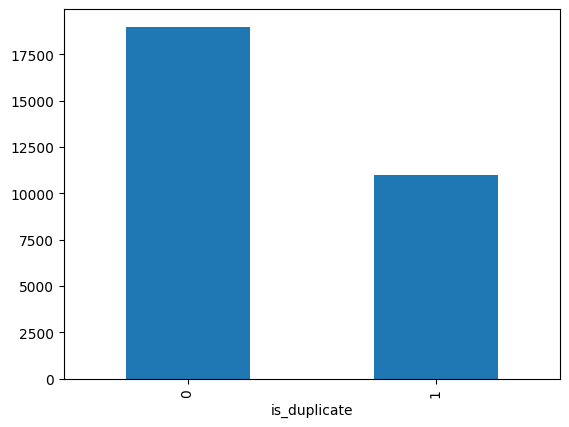

In [9]:
# check imbalance

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [10]:
# rep ques

qids = np.concat((df['qid1'].values,df['qid2'].values),axis=None)

print(qids)
print('No of qids = ', len(qids))
# print(np.unique(qids))
print('No of uniq qids = ', len(np.unique(qids)))

[637752 709068 534900 ... 242739 764043 259000]
No of qids =  60000
No of uniq qids =  59824


0        637752
1        709068
2        534900
3        430670
4        621402
          ...  
59995     20319
59996    187142
59997    242739
59998    764043
59999    259000
Length: 60000, dtype: int64


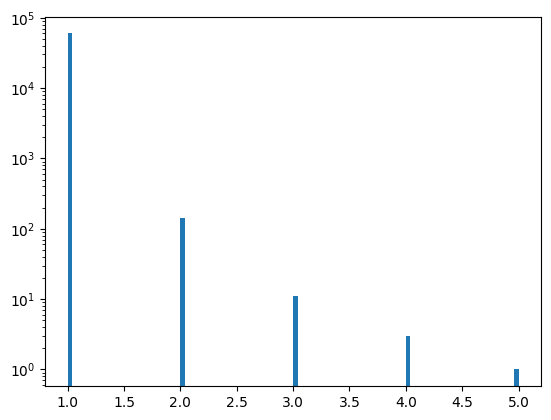

In [11]:
qids_ser = pd.Series(qids)
print(qids_ser)

plt.hist(qids_ser.value_counts(),bins=100)
plt.yscale('log')
plt.show()

Feat eng

In [12]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
325133,325133,637752,637753,What should good education be like?,What is good education?,1,35,23
362175,362175,709068,709069,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...,0,60,59
271986,271986,534900,534901,Is feminism going too far in western countries?,Do you think that there are some ways that fem...,1,47,69
218436,218436,430670,430671,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,75
316672,316672,621402,549635,What exactly is reality distortion field?,How can I develop my own reality distortion fi...,0,41,50


In [13]:
df['q1_word_cnt'] = df['question1'].apply(lambda row: len(row.split(' ')))
df['q2_word_cnt'] = df['question2'].apply(lambda row: len(row.split(' ')))

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt
325133,325133,637752,637753,What should good education be like?,What is good education?,1,35,23,6,4
362175,362175,709068,709069,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...,0,60,59,9,10
271986,271986,534900,534901,Is feminism going too far in western countries?,Do you think that there are some ways that fem...,1,47,69,8,14
218436,218436,430670,430671,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,75,13,13
316672,316672,621402,549635,What exactly is reality distortion field?,How can I develop my own reality distortion fi...,0,41,50,6,9


In [14]:
def find_common_words_cnt(row):
  uniq_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
  uniq_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
  return len(uniq_q1 & uniq_q2)

In [15]:
df['common_words_cnt'] = df.apply(find_common_words_cnt,axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt
325133,325133,637752,637753,What should good education be like?,What is good education?,1,35,23,6,4,2
362175,362175,709068,709069,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...,0,60,59,9,10,8
271986,271986,534900,534901,Is feminism going too far in western countries?,Do you think that there are some ways that fem...,1,47,69,8,14,2
218436,218436,430670,430671,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,75,13,13,12
316672,316672,621402,549635,What exactly is reality distortion field?,How can I develop my own reality distortion fi...,0,41,50,6,9,3


In [16]:
def find_words_cnt(row):
  uniq_q1 = set(map(lambda word: word.lower().strip(), row['question1'].split(' ')))
  uniq_q2 = set(map(lambda word: word.lower().strip(), row['question2'].split(' ')))
  return len(uniq_q1) + len(uniq_q2)

In [17]:
df['words_cnt'] = df.apply(find_words_cnt,axis=1)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt
325133,325133,637752,637753,What should good education be like?,What is good education?,1,35,23,6,4,2,10
362175,362175,709068,709069,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...,0,60,59,9,10,8,19
271986,271986,534900,534901,Is feminism going too far in western countries?,Do you think that there are some ways that fem...,1,47,69,8,14,2,21
218436,218436,430670,430671,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,75,13,13,12,26
316672,316672,621402,549635,What exactly is reality distortion field?,How can I develop my own reality distortion fi...,0,41,50,6,9,3,15


In [18]:
df['words_share'] = round(df['common_words_cnt']/df['words_cnt'],3)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share
325133,325133,637752,637753,What should good education be like?,What is good education?,1,35,23,6,4,2,10,0.200
362175,362175,709068,709069,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...,0,60,59,9,10,8,19,0.421
271986,271986,534900,534901,Is feminism going too far in western countries?,Do you think that there are some ways that fem...,1,47,69,8,14,2,21,0.095
218436,218436,430670,430671,What individuals and events in history are a s...,What individuals and events in history are a s...,0,71,75,13,13,12,26,0.462
316672,316672,621402,549635,What exactly is reality distortion field?,How can I develop my own reality distortion fi...,0,41,50,6,9,3,15,0.200


Analyze feats

min chars =  2
max chars =  315
mean chars =  59


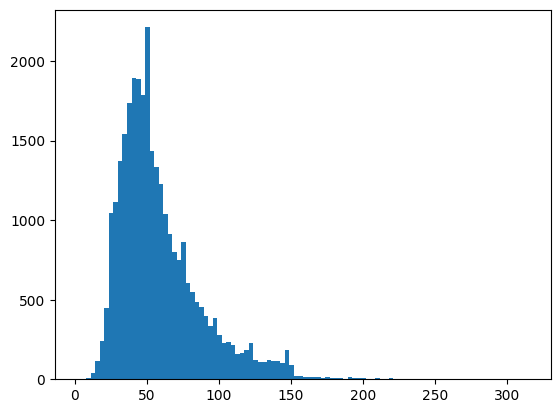

In [19]:
print('min chars = ', df['q1_len'].min())
print('max chars = ', df['q1_len'].max())
print('mean chars = ', int(df['q1_len'].mean()))

plt.hist(df['q1_len'],bins=100)
plt.show()

min chars =  7
max chars =  498
mean chars =  59


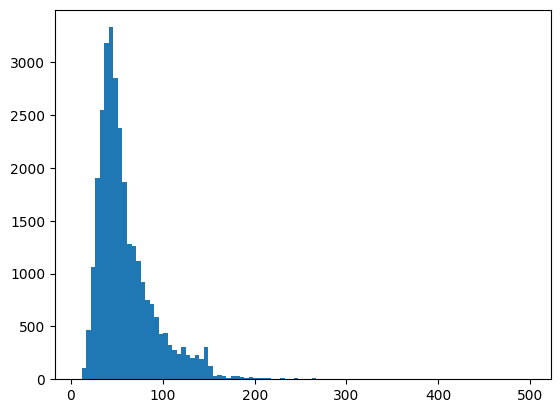

In [20]:
print('min chars = ', df['q2_len'].min())
print('max chars = ', df['q2_len'].max())
print('mean chars = ', int(df['q2_len'].mean()))

plt.hist(df['q2_len'],bins=100)
plt.show()

min chars =  1
max chars =  66
mean chars =  10


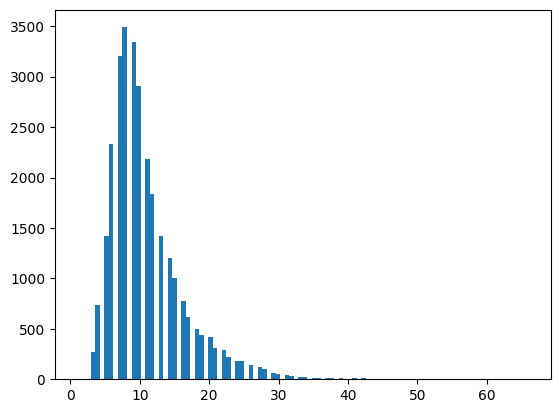

In [21]:
print('min chars = ', df['q1_word_cnt'].min())
print('max chars = ', df['q1_word_cnt'].max())
print('mean chars = ', int(df['q1_word_cnt'].mean()))

plt.hist(df['q1_word_cnt'],bins=100)
plt.show()

min chars =  2
max chars =  92
mean chars =  11


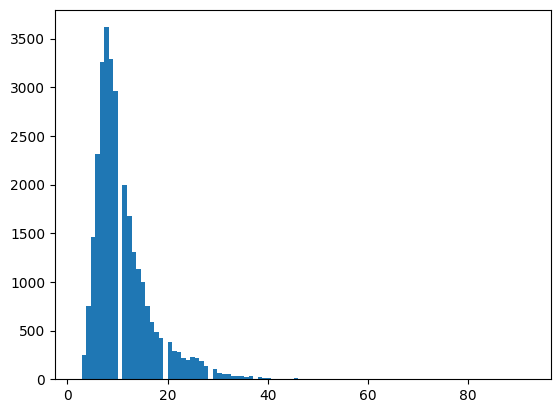

In [22]:
print('min chars = ', df['q2_word_cnt'].min())
print('max chars = ', df['q2_word_cnt'].max())
print('mean chars = ', int(df['q2_word_cnt'].mean()))

plt.hist(df['q2_word_cnt'],bins=100)
plt.show()

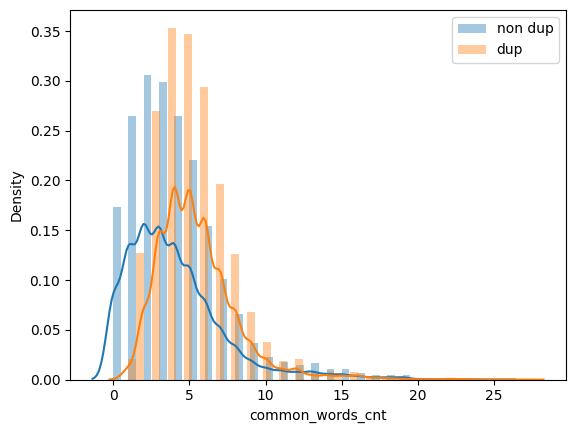

In [23]:
sns.distplot(df[df['is_duplicate']==0]['common_words_cnt'],label='non dup')
sns.distplot(df[df['is_duplicate']==1]['common_words_cnt'],label='dup')
plt.legend()
plt.show()

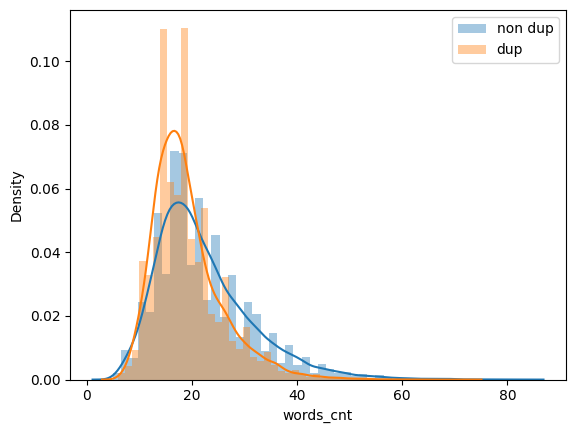

In [24]:
sns.distplot(df[df['is_duplicate']==0]['words_cnt'],label='non dup')
sns.distplot(df[df['is_duplicate']==1]['words_cnt'],label='dup')
plt.legend()
plt.show()

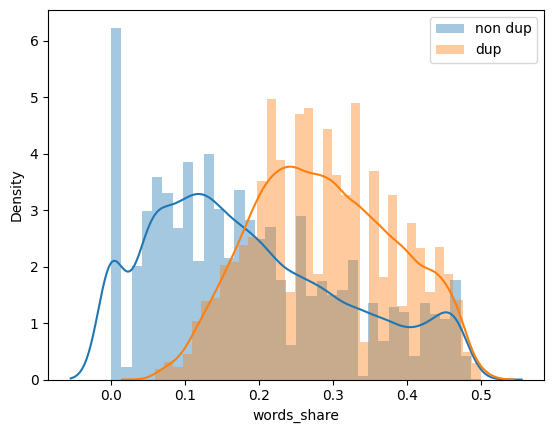

In [25]:
sns.distplot(df[df['is_duplicate']==0]['words_share'],label='non dup')
sns.distplot(df[df['is_duplicate']==1]['words_share'],label='dup')
plt.legend()
plt.show()

In [26]:
qdf = df[['question1','question2']]
qdf.head()

,question1,question2
325133,What should good education be like?,What is good education?
362175,Sci Research: How does scientific funding work...,Sci Research: How does scientific funding work...
271986,Is feminism going too far in western countries?,Do you think that there are some ways that fem...
218436,What individuals and events in history are a s...,What individuals and events in history are a s...
316672,What exactly is reality distortion field?,How can I develop my own reality distortion fi...


In [27]:
fin_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(fin_df.shape)
fin_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share
325133,1,35,23,6,4,2,10,0.200
362175,0,60,59,9,10,8,19,0.421
271986,1,47,69,8,14,2,21,0.095
218436,0,71,75,13,13,12,26,0.462
316672,0,41,50,6,9,3,15,0.200


In [28]:
ques = list(qdf['question1']) + list(qdf['question2'])

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(ques).toarray(),2)

In [30]:
temp_df1 = pd.DataFrame(q1_arr, index= qdf.index)
temp_df2 = pd.DataFrame(q2_arr, index= qdf.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)

temp_df.shape

(30000, 6000)

In [31]:
fin_df = pd.concat([fin_df,temp_df],axis=1)

print(fin_df.shape)
fin_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_word_cnt,q2_word_cnt,common_words_cnt,words_cnt,words_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
325133,1,35,23,6,4,2,10,0.200,0,0,...,0,0,0,0,0,0,0,0,0,0
362175,0,60,59,9,10,8,19,0.421,0,0,...,0,0,0,0,0,0,0,0,0,0
271986,1,47,69,8,14,2,21,0.095,0,0,...,0,1,0,0,0,0,0,0,0,0
218436,0,71,75,13,13,12,26,0.462,0,0,...,0,0,0,0,0,0,0,0,0,0
316672,0,41,50,6,9,3,15,0.200,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fin_df.iloc[:,1:].values, fin_df['is_duplicate'].values, test_size=0.2, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7643333333333333

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7643333333333333